In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import re
df = pd.read_csv("data/results-surveyHand.csv", encoding="utf-8")
df.head()



,Antwort ID,Datum Abgeschickt,Letzte Seite,Start-Sprache,Zufallsstartwert,Datum gestartet,Datum letzte Aktivität,Wie alt sind Sie? (Angabe in Jahren),Welchem Geschlecht fühlen Sie sich zugehörig?,Wie lange haben Sie sich in der Installation aufgehalten?,...,Fragenzeit: G04Q09,Fragenzeit: G04Q10,Fragenzeit: G04Q011,Gruppenzeit: Interaktion wurde wahrgenommen,Fragenzeit: G05Q12,Gruppenzeit: Zufriedenheit,Fragenzeit: G06Q13,Fragenzeit: G06Q14,Fragenzeit: G06Q15,Fragenzeit: G06Q16
0,1,2025-03-13 10:52:15,5,de,741096824,2025-03-13 10:51:13,2025-03-13 10:52:15,28.0,männlich,5-10 Minuten,...,NaN,NaN,NaN,6.17,NaN,8.18,NaN,NaN,NaN,NaN
1,2,2025-03-13 11:00:42,5,de,1961816463,2025-03-13 10:57:10,2025-03-13 11:00:42,61.0,weiblich,2-5 Minuten,...,NaN,NaN,NaN,14.24,NaN,87.40,NaN,NaN,NaN,NaN
2,3,2025-03-13 11:02:28,5,de,1265896231,2025-03-13 10:57:43,2025-03-13 11:02:28,63.0,weiblich,Länger als 10 Minuten,...,NaN,NaN,NaN,11.77,NaN,180.76,NaN,NaN,NaN,NaN
3,4,2025-03-13 11:03:22,5,de,840209447,2025-03-13 10:58:57,2025-03-13 11:03:22,44.0,weiblich,5-10 Minuten,...,NaN,NaN,NaN,22.09,NaN,108.41,NaN,NaN,NaN,NaN
4,5,2025-03-13 11:10:45,5,de,889877015,2025-03-13 11:06:34,2025-03-13 11:10:45,70.0,weiblich,weniger als 2 Minuten,...,NaN,NaN,NaN,25.30,NaN,58.46,NaN,NaN,NaN,NaN


In [3]:
# Beispiel: alles, was mit "Fragenzeit:" oder "Gruppenzeit:" oder "Zufallsstartwert" beginnt
technical_cols = [col for col in df.columns if col.startswith("Fragenzeit:") 
                  or col.startswith("Gruppenzeit:") 
                  or "Zufallsstartwert" in col 
                  or "Letzte Seite" in col 
                  or "Start-Sprache" in col]

df_cleaned = df.drop(columns=technical_cols)
df_cleaned.head()

,Antwort ID,Datum Abgeschickt,Datum gestartet,Datum letzte Aktivität,Wie alt sind Sie? (Angabe in Jahren),Welchem Geschlecht fühlen Sie sich zugehörig?,Wie lange haben Sie sich in der Installation aufgehalten?,Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?,Umgang mit Technologie [ Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien? ],"Räumliche Präsenz Skala [Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war. ]",...,"Interaktions Skala [Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.]","Interaktions Skala [Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte.]",Systemeffizienz [Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.],Systemeffizienz [Die Steuerung des Systems war intuitiv und leicht verständlich.],Systemeffizienz [Ich konnte meine beabsichtigten Aktionen problemlos ausführen.],Gesamteindruck [Wie zufrieden waren Sie insgesamt mit der Rauminstallation?],Was hat Ihnen an der Installation am meisten gefallen?,Was hätte verbessert werden können?,Würden Sie diese Installation weiterempfehlen?,Gesamtzeit
0,1,2025-03-13 10:52:15,2025-03-13 10:51:13,2025-03-13 10:52:15,28.0,männlich,5-10 Minuten,"Ja, mehrfach",4,5,...,5,5,5.0,5.0,5.0,5,,,Ja,64.24
1,2,2025-03-13 11:00:42,2025-03-13 10:57:10,2025-03-13 11:00:42,61.0,weiblich,2-5 Minuten,"Ja, mehrfach",3,3,...,4,3,5.0,5.0,5.0,5,Kombi- Raum/Licht-geräu,Alles gut,Ja,212.87
2,3,2025-03-13 11:02:28,2025-03-13 10:57:43,2025-03-13 11:02:28,63.0,weiblich,Länger als 10 Minuten,"Ja, mehrfach",1,5,...,5,5,5.0,5.0,5.0,5,Die Interaktion und eIne neue Wahrnehmung der ...,ch,Ja,285.96
3,4,2025-03-13 11:03:22,2025-03-13 10:58:57,2025-03-13 11:03:22,44.0,weiblich,5-10 Minuten,"Ja, mehrfach",1,4,...,4,4,5.0,5.0,5.0,5,Auswahl der Bilder im der zweiten Installation...,nichts,Ja,266.63
4,5,2025-03-13 11:10:45,2025-03-13 11:06:34,2025-03-13 11:10:45,70.0,weiblich,weniger als 2 Minuten,Nein,2,1,...,1,1,3.0,3.0,3.0,1,,Zu eng(kleiner Raum),Nein,251.67


In [4]:
# 3. Funktion zum Extrahieren aus Klammern
def extract_bracket_text(colname):
    match = re.search(r"\[(.*?)\]", colname)
    return match.group(1).strip() if match else colname.strip()

In [5]:
# 4. Fragetexte extrahieren
df = df.rename(columns={col: extract_bracket_text(col) for col in df.columns})

In [6]:
# 5. Spalten umbenennen (Mapping)
column_mapping = {
    "Datum Abgeschickt": "Zeitstempel",
    "Wie alt sind Sie? (Angabe in Jahren)": "Alter",
    "Welchem Geschlecht fühlen Sie sich zugehörig?": "Geschlecht",
    "Wie lange haben Sie sich in der Installation aufgehalten?": "Aufenthaltsdauer",
    "Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?": "Erfahrung",
    "Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien": "Digitale Kompetenz",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war.": "SL1",
    "Es schien, als ob ich tatsächlich an der Darstellung beteiligt war.": "SL2",
    "Es kam mir vor, als hätte sich mein wahrer Standort in die Umgebung der Projektion verschoben.": "SL3",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion physisch anwesend war.": "SL4",
    "Die Objekte in der Projektion gaben mir das Gefühl, dass ich mit ihnen etwas anfangen kann.": "PA1",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion agieren konnte.": "PA2",
    "Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.": "PA3",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte.": "PA4",
    "Haben Sie bemerkt, dass ihre Bewegung die Projektion auf der linken Seite beeinflusst?": "Interaktion_bemerkt",
    "Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.": "UX1",
    "Die Steuerung des Systems war intuitiv und leicht verständlich.": "UX2",
    "Ich konnte meine beabsichtigten Aktionen problemlos ausführen.": "UX3",
    "Wie zufrieden waren Sie insgesamt mit der Rauminstallation?": "Zufriedenheit",
    "Würden Sie diese Installation weiterempfehlen?": "Empfehlung"


}
df = df.rename(columns=column_mapping)

In [7]:
# SPES-Unterteilung

# 6. SPES-Spalten
sl_items = ["SL1", "SL2", "SL3", "SL4"]
pa_items = ["PA1", "PA2", "PA3", "PA4"]
print(sl_items)
print(pa_items)



['SL1', 'SL2', 'SL3', 'SL4']
['PA1', 'PA2', 'PA3', 'PA4']


In [8]:
# 7. Likert-Mapping
likert_map = {
    "Stimme überhaupt nicht zu": 1,
    "Stimme eher nicht zu": 2,
    "Neutral": 3,
    "Stimme eher zu": 4,
    "Stimme voll und ganz zu": 5,
}

def extract_likert_value(text):
    if pd.isna(text):
        return np.nan
    for key, value in likert_map.items():
        if key in str(text):
            return value
    try:
        return int(text)
    except:
        return np.nan

for col in sl_items + pa_items:
    df[col] = df[col].apply(extract_likert_value)

In [9]:
# 8. Mittelwerte
df["SL_Mean"] = df[sl_items].mean(axis=1)
df["PA_Mean"] = df[pa_items].mean(axis=1)

In [10]:
df[["SL_Mean", "PA_Mean"]].describe()

,SL_Mean,PA_Mean
count,107.000000,107.000000
mean,3.271028,3.509346
std,0.968320,0.946646
min,1.000000,1.000000
25%,2.500000,3.000000
50%,3.250000,3.500000
75%,4.000000,4.250000
max,5.000000,5.000000


In [11]:
# Hilfsspalte "Grashalm_interaktion_bemerkt" vereinfachen
df["Interaktion_bemerkt"] = df[
    "Haben Sie bemerkt, dass ihre Handbewegung die Projektion auf der linken Seite beeinflusst?"
].apply(lambda x: "Ja" if x == "Ja" else "Nein")

In [12]:
df["Interaktion_bemerkt"] = df["Interaktion_bemerkt"].apply(lambda x: "Ja" if x == "Ja" else "Nein")


In [13]:
df.groupby("Interaktion_bemerkt")[["SL_Mean", "PA_Mean"]].mean()
# Mittelwerte für SL und PA nach Interaktion erkannt


,SL_Mean,PA_Mean
Interaktion_bemerkt,,
Ja,3.400568,3.642045
Nein,2.671053,2.894737


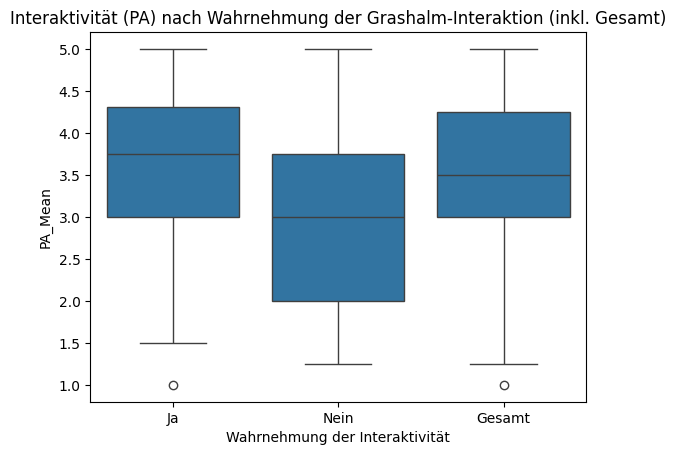

In [14]:
# Neue Kopie der Daten mit "Gesamt"-Gruppe
df_gesamt = df.copy()
df_gesamt["Interaktion_bemerkt"] = "Gesamt"

# Kombinieren der Gruppen
df_combined = pd.concat([df, df_gesamt], ignore_index=True)

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_combined, x="Interaktion_bemerkt", y="PA_Mean")
plt.title("Interaktivität (PA) nach Wahrnehmung der Grashalm-Interaktion (inkl. Gesamt)")
plt.xlabel("Wahrnehmung der Interaktivität")
plt.ylabel("PA_Mean")
plt.show()


In [15]:
ux_items = ["UX1", "UX2", "UX3"]
# UX Items (Neue Skala für Systemeffizienz)

In [16]:
df_interaktiv = df[df["Interaktion_bemerkt"] == "Ja"].copy()
# Neuer Dataframe für Interaktion erkannt


In [17]:
from scipy.stats import zscore
from numpy import nanmean

def cronbach_alpha(df_subset):
    df_corr = df_subset.corr()
    N = len(df_subset.columns)
    mean_corr = df_corr.where(~np.eye(N, dtype=bool)).mean().mean()
    return (N * mean_corr) / (1 + (N - 1) * mean_corr)

for col in ux_items:
    df_interaktiv[col] = df_interaktiv[col].apply(extract_likert_value)

print(cronbach_alpha(df_interaktiv[ux_items]))
# Cronbachs Alpha für UX Items (Interaktion erkannt)
print(df_interaktiv[ux_items].describe())

0.82186277443055
             UX1        UX2        UX3
count  88.000000  88.000000  88.000000
mean    4.386364   4.102273   4.090909
std     0.902510   1.145102   1.012977
min     2.000000   1.000000   2.000000
25%     4.000000   3.000000   3.000000
50%     5.000000   5.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [18]:
print("Cronbach’s Alpha für SL:", cronbach_alpha(df[sl_items]))
print("Cronbach’s Alpha für PA:", cronbach_alpha(df[pa_items]))
print("Cronbach’s Alpha für SPES (gesamt):", cronbach_alpha(df[sl_items + pa_items]))
# Cronbach’s Alpha für SL, PA und SPES (gesamt)

Cronbach’s Alpha für SL: 0.7755175178464158
Cronbach’s Alpha für PA: 0.7752229624702803
Cronbach’s Alpha für SPES (gesamt): 0.870072277387061


In [19]:
# Gruppe: Interaktion bemerkt
df_interaktion_bemerkt = df[df["Interaktion_bemerkt"] == "Ja"]

# Gruppe: Interaktion nicht bemerkt
df_interaktion_nicht_bemerkt = df[df["Interaktion_bemerkt"] == "Nein"]

# Gruppe: Gesamt (alle Teilnehmenden)
df_gesamt = df.copy()

In [20]:
# Interessante Variablen
interessante_variablen = [
    "SL_Mean", "PA_Mean",
    "Empfehlung", "Alter", "Zufriedenheit",
    "Geschlecht", "Erfahrung", "Aufenthaltsdauer"
]

# Deskriptive Statistik für alle Variablen (einschließlich nicht-numerischer)
print("🔍 Deskriptive Statistik – Interaktion bemerkt")
print(df_interaktion_bemerkt[interessante_variablen].describe(include='all'))

print("\n🔍 Deskriptive Statistik – Interaktion nicht bemerkt")
print(df_interaktion_nicht_bemerkt[interessante_variablen].describe(include='all'))

print("\n🔍 Deskriptive Statistik – Gesamt")
print(df_gesamt[interessante_variablen].describe(include='all'))


# Hier nochmal ransetzen Zufriedenheitsskala noch nicht richtig codiert

🔍 Deskriptive Statistik – Interaktion bemerkt
          SL_Mean    PA_Mean Empfehlung      Alter  Zufriedenheit Geschlecht  \
count   88.000000  88.000000         88  87.000000      88.000000         88   
unique        NaN        NaN          3        NaN            NaN          2   
top           NaN        NaN         Ja        NaN            NaN   weiblich   
freq          NaN        NaN         78        NaN            NaN         65   
mean     3.400568   3.642045        NaN  49.091954       4.329545        NaN   
std      0.896625   0.865026        NaN  17.867492       0.906193        NaN   
min      1.250000   1.000000        NaN  21.000000       1.000000        NaN   
25%      2.750000   3.000000        NaN  34.000000       4.000000        NaN   
50%      3.500000   3.750000        NaN  44.000000       5.000000        NaN   
75%      4.000000   4.312500        NaN  66.000000       5.000000        NaN   
max      5.000000   5.000000        NaN  80.000000       5.000000        N

In [21]:
#Durchführen von ttest

# Gruppen aufteilen
gruppe_ja = df[df["Interaktion_bemerkt"] == "Ja"]
gruppe_nein = df[df["Interaktion_bemerkt"] == "Nein"]


In [22]:
#Berechnung für PA_Mean
from scipy.stats import ttest_ind

# Werte extrahieren
pa_ja = gruppe_ja["PA_Mean"]
pa_nein = gruppe_nein["PA_Mean"]

# Welch's t-Test (empfohlen bei ungleicher Varianz/Größe)
t_pa, p_pa = ttest_ind(pa_ja, pa_nein, equal_var=False)

print(f"t-Wert PA_Mean: {t_pa:.3f}, p-Wert: {p_pa:.3f}")


t-Wert PA_Mean: 2.817, p-Wert: 0.010


In [23]:
#Berechnung für SL_Mean
sl_ja = gruppe_ja["SL_Mean"]
sl_nein = gruppe_nein["SL_Mean"]

t_sl, p_sl = ttest_ind(sl_ja, sl_nein, equal_var=False)
print(f"t-Wert SL_Mean: {t_sl:.3f}, p-Wert: {p_sl:.3f}")

t-Wert SL_Mean: 2.739, p-Wert: 0.012


In [24]:
#SPES Mean berechnen
# Berechnung von SPES_Mean
spes_items = sl_items + pa_items  # SL- und PA-Items kombinieren
df["SPES_Mean"] = df[spes_items].mean(axis=1)


In [25]:
# Filtern der Gruppen basierend auf der Spalte "Interaktion_bemerkt"
gruppe_ja = df[df["Interaktion_bemerkt"] == "Ja"]
gruppe_nein = df[df["Interaktion_bemerkt"] == "Nein"]


In [26]:
# Berechnung für SPES
spes_ja = gruppe_ja["SPES_Mean"]
spes_nein = gruppe_nein["SPES_Mean"]

# t-Test durchführen
from scipy.stats import ttest_ind

t_spes, p_spes = ttest_ind(spes_ja, spes_nein, equal_var=False)
print(f"t-Wert SPES_Mean: {t_spes:.3f}, p-Wert: {p_spes:.3f}")


t-Wert SPES_Mean: 2.861, p-Wert: 0.009


In [27]:
#Berechnung Cohens d (Effektstärke)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_pa = cohens_d(gruppe_ja["PA_Mean"], gruppe_nein["PA_Mean"])
d_sl = cohens_d(gruppe_ja["SL_Mean"], gruppe_nein["SL_Mean"])
d_spes = cohens_d(gruppe_ja["SPES_Mean"], gruppe_nein["SPES_Mean"])


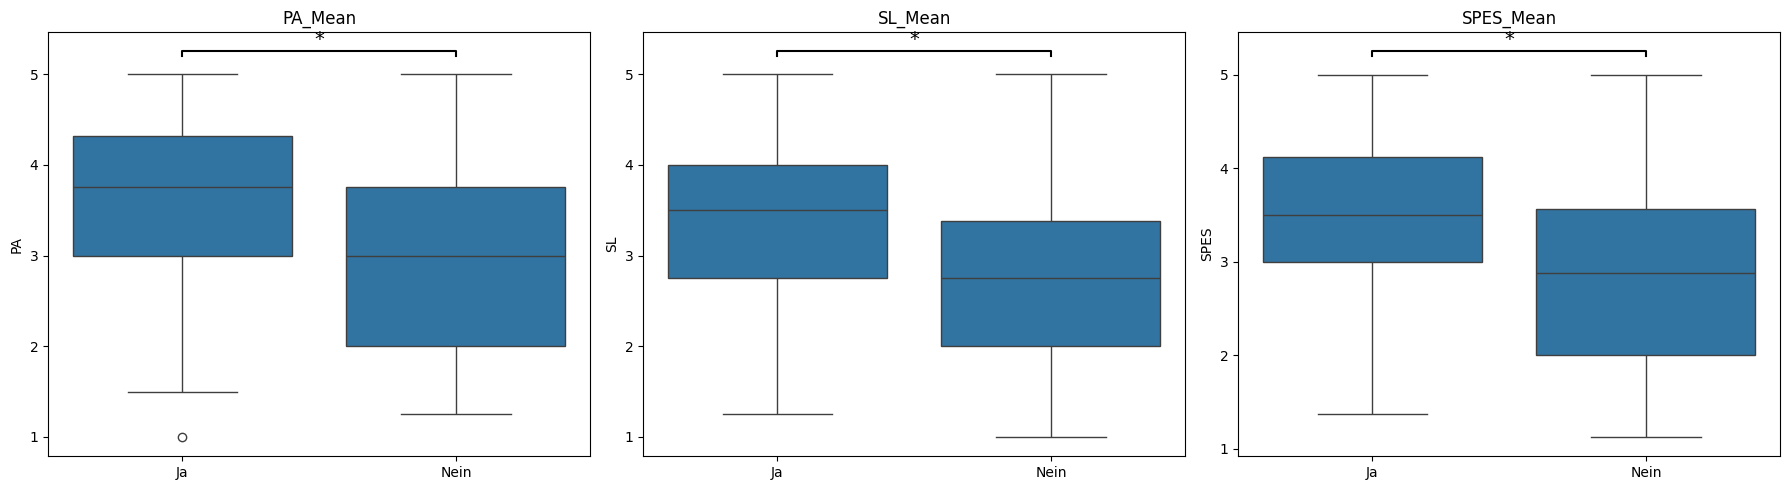

In [28]:
#Visualisierung von ttests durch Boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot für PA
sns.boxplot(data=df, x="Interaktion_bemerkt", y="PA_Mean", ax=axs[0])
axs[0].set_title("PA_Mean")
axs[0].set_xlabel("")
axs[0].set_ylabel("PA")

# Signifikanzbalken
y = df["PA_Mean"].max() + 0.2
axs[0].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[0].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SL
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SL_Mean", ax=axs[1])
axs[1].set_title("SL_Mean")
axs[1].set_xlabel("")
axs[1].set_ylabel("SL")
y = df["SL_Mean"].max() + 0.2
axs[1].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[1].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SPES
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SPES_Mean", ax=axs[2])
axs[2].set_title("SPES_Mean")
axs[2].set_xlabel("")
axs[2].set_ylabel("SPES")
y = df["SPES_Mean"].max() + 0.2
axs[2].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[2].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()


In [29]:
# Ergebnisse visualisieren in Tabelle
results_df = pd.DataFrame({
    "Variable": ["PA_Mean", "SL_Mean", "SPES_Mean"],
    "t-Wert": [2.817, 2.739, 2.861],
    "p-Wert": [0.010, 0.012, 0.009],
    "Cohen's d": [d_pa, d_sl, d_spes]
})

display(results_df)
# Ausgabe der Ausprägungen der ux_items-Spalten


,Variable,t-Wert,p-Wert,Cohen's d
0,PA_Mean,2.817,0.010,0.824480
1,SL_Mean,2.739,0.012,0.783307
2,SPES_Mean,2.861,0.009,0.865082


In [30]:
# Überprüfen, ob noch nicht-numerische Werte vorhanden sind
for col in ux_items:
    non_numeric = df_interaktiv[col].apply(lambda x: isinstance(x, str) and not x.isnumeric())
    print(f"Nicht-numerische Werte in der Spalte {col}:")
    print(df_interaktiv[non_numeric][col])
    print("\n")


Nicht-numerische Werte in der Spalte UX1:
Series([], Name: UX1, dtype: int64)


Nicht-numerische Werte in der Spalte UX2:
Series([], Name: UX2, dtype: int64)


Nicht-numerische Werte in der Spalte UX3:
Series([], Name: UX3, dtype: int64)




In [31]:
import re

# Funktion, um nur die Zahl aus einem Text herauszufiltern
def extract_number_from_text(text):
    if pd.isna(text):
        return np.nan
    # Sucht nach der ersten Zahl im Text und gibt sie zurück
    match = re.search(r'\d+', str(text))  # Sucht nach einer Zahl
    if match:
        return int(match.group())  # Gibt die Zahl zurück
    return np.nan  # Falls keine Zahl gefunden wurde, NaN zurückgeben

# Wende diese Funktion auf alle relevanten UX-Spalten an
df_interaktiv[ux_items] = df_interaktiv[ux_items].map(extract_number_from_text)

# Überprüfe die Umwandlung
print(df_interaktiv[ux_items].head())


   UX1  UX2  UX3
0    5    5    5
1    5    5    5
2    5    5    5
3    5    5    5
4    3    3    3


In [32]:
# Mapping der Likert-Texte zu Zahlen
likert_map = {
    "Stimme überhaupt nicht zu": 1,
    "Stimme eher nicht zu": 2,
    "Neutral": 3,
    "Stimme eher zu": 4,
    "Stimme voll und ganz zu": 5,
}

# Funktion, die den Textwert auf der Basis der Likert-Skala umwandelt
def extract_likert_value(text):
    if pd.isna(text):
        return np.nan
    for key, value in likert_map.items():
        if key in str(text):  # Überprüft, ob der Textwert mit einem Likert-Wert übereinstimmt
            return value
    try:
        return int(text)  # Für den Fall, dass der Text bereits eine Zahl ist (z.B. "5")
    except:
        return np.nan  # Wenn der Text nicht in einen Wert umgewandelt werden kann

# Wende diese Funktion auf alle relevanten UX-Spalten an
for col in ux_items:
    df_interaktiv[col] = df_interaktiv[col].map(extract_likert_value)


# Überprüfe die Umwandlung
print(df_interaktiv[ux_items].head())
df_interaktiv["UX_Mean"] = df_interaktiv[ux_items].mean(axis=1)

# Ausgabe des berechneten Mittelwerts
print(df_interaktiv["UX_Mean"].head())
print(df_interaktiv[ux_items].describe())


   UX1  UX2  UX3
0    5    5    5
1    5    5    5
2    5    5    5
3    5    5    5
4    3    3    3
0    5.0
1    5.0
2    5.0
3    5.0
4    3.0
Name: UX_Mean, dtype: float64
             UX1        UX2        UX3
count  88.000000  88.000000  88.000000
mean    4.386364   4.102273   4.090909
std     0.902510   1.145102   1.012977
min     2.000000   1.000000   2.000000
25%     4.000000   3.000000   3.000000
50%     5.000000   5.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [33]:
# UX-Mittelwert berechnen – nur für Gruppe "Ja"
df_interaktiv["UX_Mean"] = df_interaktiv[ux_items].mean(axis=1)

# Ausgabe des berechneten Mittelwerts
print(df_interaktiv["UX_Mean"].head())
print(df_interaktiv[ux_items].describe())

0    5.0
1    5.0
2    5.0
3    5.0
4    3.0
Name: UX_Mean, dtype: float64
             UX1        UX2        UX3
count  88.000000  88.000000  88.000000
mean    4.386364   4.102273   4.090909
std     0.902510   1.145102   1.012977
min     2.000000   1.000000   2.000000
25%     4.000000   3.000000   3.000000
50%     5.000000   5.000000   4.000000
75%     5.000000   5.000000   5.000000
max     5.000000   5.000000   5.000000


In [34]:
# Nur die Gruppe, die die Interaktion bemerkt hat
df_interaktiv_ja = df_interaktiv[df_interaktiv["Interaktion_bemerkt"] == "Ja"]

# Berechnung des UX-Mittelwerts für die Gruppe "Ja"
mean_interaktion_bemerkt = df_interaktiv_ja["UX_Mean"].mean()

# Ausgabe des Mittelwerts
print(f"UX-Mittelwert für die Gruppe 'Interaktion bemerkt': {mean_interaktion_bemerkt}")



UX-Mittelwert für die Gruppe 'Interaktion bemerkt': 4.193181818181818


In [35]:
#SPES_Mean für Dataframe Interaktiv definieren
df_interaktiv["SPES_Mean"] = df_interaktiv[sl_items + pa_items].mean(axis=1)


In [36]:
from scipy.stats import pearsonr


# A) Immersion vs. Interaktivität (gesamte Stichprobe)
r_sl_pa, p_sl_pa = pearsonr(df["SL_Mean"], df["PA_Mean"])

# B) UX vs. Interaktivität (nur Gruppe "Ja")
r_ux_pa, p_ux_pa = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["PA_Mean"])

# C) UX vs. Immersion (nur Gruppe "Ja")
r_ux_sl, p_ux_sl = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SL_Mean"])

# D) UX vs. SPES (nur Gruppe "Ja")
r_ux_spes, p_ux_spes = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SPES_Mean"])


In [37]:
# Tabelle erstellen
correlation_df = pd.DataFrame({
    "Korrelation": [
        "SL_Mean ↔ PA_Mean (gesamt)",
        "UX_Mean ↔ PA_Mean (nur 'Ja')",
        "UX_Mean ↔ SL_Mean (nur 'Ja')",
        "UX_Mean ↔ SPES_Mean (nur 'Ja')"
    ],
    "r-Wert": [r_sl_pa, r_ux_pa, r_ux_sl, r_ux_spes],
    "p-Wert": [p_sl_pa, p_ux_pa, p_ux_sl, p_ux_spes]
})

# Ergebnisse anzeigen
display(correlation_df)


,Korrelation,r-Wert,p-Wert
0,SL_Mean ↔ PA_Mean (gesamt),0.749792,1.512975e-20
1,UX_Mean ↔ PA_Mean (nur 'Ja'),0.377797,2.847008e-04
2,UX_Mean ↔ SL_Mean (nur 'Ja'),0.397711,1.245124e-04
3,UX_Mean ↔ SPES_Mean (nur 'Ja'),0.425049,3.661991e-05


In [38]:
# Neue Altersgruppen erstellen (z. B. in 10er-Schritten)
df["Altersgruppe"] = pd.cut(
    df["Alter"],
    bins=[0, 19, 29, 39, 49, 59, 120],
    labels=["<20", "20–29", "30–39", "40–49", "50–59", "60+"]
)


In [39]:
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen
alter_kontingenz = pd.crosstab(df["Interaktion_bemerkt"], df["Altersgruppe"])

# Chi²-Test berechnen
chi2_alt, p_alt, dof_alt, expected_alt = chi2_contingency(alter_kontingenz)

# Ergebnisse ausgeben
print("Chi²-Wert:", round(chi2_alt, 3))
print("p-Wert:", round(p_alt, 3))
print("Freiheitsgrade:", dof_alt)
print("\nErwartete Häufigkeiten:")
print(pd.DataFrame(expected_alt, index=alter_kontingenz.index, columns=alter_kontingenz.columns))


Chi²-Wert: 8.008
p-Wert: 0.091
Freiheitsgrade: 4

Erwartete Häufigkeiten:
Altersgruppe             20–29      30–39     40–49     50–59        60+
Interaktion_bemerkt                                                     
Ja                   20.518868  14.773585  9.849057  7.386792  34.471698
Nein                  4.481132   3.226415  2.150943  1.613208   7.528302


In [40]:
# Nur relevante UX-Spalten aus der interaktiven Gruppe
korrelationsmatrix = df_interaktiv[ux_items].corr()

# Ausgabe der Korrelationsmatrix
print("Inter-Item-Korrelationsmatrix (UX):")
print(korrelationsmatrix.round(2))


Inter-Item-Korrelationsmatrix (UX):
      UX1   UX2   UX3
UX1  1.00  0.58  0.63
UX2  0.58  1.00  0.61
UX3  0.63  0.61  1.00


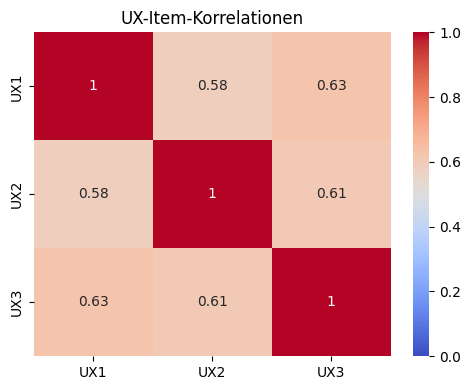

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(korrelationsmatrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("UX-Item-Korrelationen")
plt.tight_layout()
plt.show()


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisierung der UX-Daten (nur interaktive Gruppe)
scaler = StandardScaler()
ux_scaled = scaler.fit_transform(df_interaktiv[ux_items])

# PCA mit einem Faktor
pca = PCA(n_components=1)
pca.fit(ux_scaled)

# Faktorladungen berechnen
loadings = pd.Series(pca.components_[0], index=ux_items)

# Ergebnisse anzeigen
print("\nFaktorladungen der UX-Items:")
print(loadings.round(2))

# Erklärte Varianz anzeigen
print("\nErklärte Varianz durch Faktor 1:", round(pca.explained_variance_ratio_[0] * 100, 2), "%")



Faktorladungen der UX-Items:
UX1    0.58
UX2    0.57
UX3    0.58
dtype: float64

Erklärte Varianz durch Faktor 1: 73.74 %


T-Test für PA_Mean:
t = 3.533, p = 0.001, Cohen’s d = 0.485


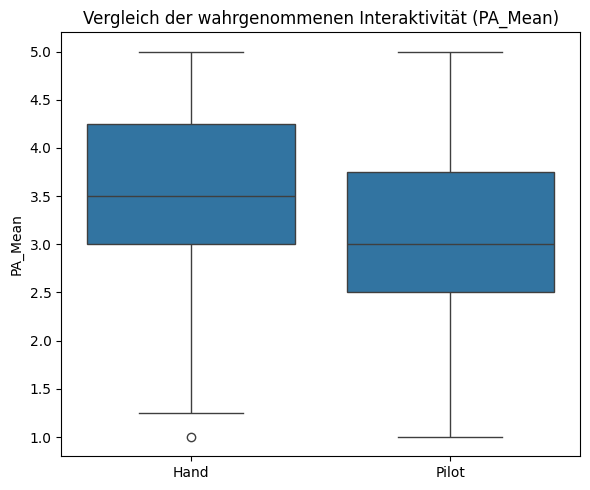

In [43]:
# Pilot-Daten laden und bereinigen (wie im Hand-Notebook schon gemacht)
df_pilot = pd.read_csv("data/results-surveyPilot.csv", encoding="utf-8")

# Likert-Mapping
likert_map = {
    "Stimme überhaupt nicht zu": 1,
    "Stimme eher nicht zu": 2,
    "Neutral": 3,
    "Stimme eher zu": 4,
    "Stimme voll und ganz zu": 5,
}

def extract_likert_value(text):
    if pd.isna(text):
        return np.nan
    for key, value in likert_map.items():
        if key in str(text):
            return value
    try:
        return int(text)
    except:
        return np.nan

# Relevante Spalten extrahieren
pa_items = [
    "Die Objekte in der Projektion gaben mir das Gefühl, dass ich mit ihnen etwas anfangen kann.",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion agieren konnte.",
    "Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte."
]

for col in pa_items:
    df_pilot[col] = df_pilot[col].apply(extract_likert_value)

df_pilot["PA_Mean"] = df_pilot[pa_items].mean(axis=1)

# Gruppenvergleich PA_Mean
from scipy.stats import ttest_ind

# Werte extrahieren
pa_hand = df["PA_Mean"].dropna()
pa_pilot = df_pilot["PA_Mean"].dropna()

# T-Test
t_pa, p_pa = ttest_ind(pa_hand, pa_pilot, equal_var=False)

# Effektstärke
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_pa = cohens_d(pa_hand, pa_pilot)

# Ausgabe
print(f"T-Test für PA_Mean:")
print(f"t = {t_pa:.3f}, p = {p_pa:.3f}, Cohen’s d = {d_pa:.3f}")

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.DataFrame({
    "PA_Mean": list(pa_hand) + list(pa_pilot),
    "Gruppe": ["Hand"] * len(pa_hand) + ["Pilot"] * len(pa_pilot)
})

plt.figure(figsize=(6, 5))
sns.boxplot(data=combined_df, x="Gruppe", y="PA_Mean")
plt.title("Vergleich der wahrgenommenen Interaktivität (PA_Mean)")
plt.ylabel("PA_Mean")
plt.xlabel("")
plt.tight_layout()
plt.show()


T-Test SL_Mean: t = 3.123, p = 0.002, Cohen’s d = 0.429
T-Test SPES_Mean: t = 3.681, p = 0.000, Cohen’s d = 0.505


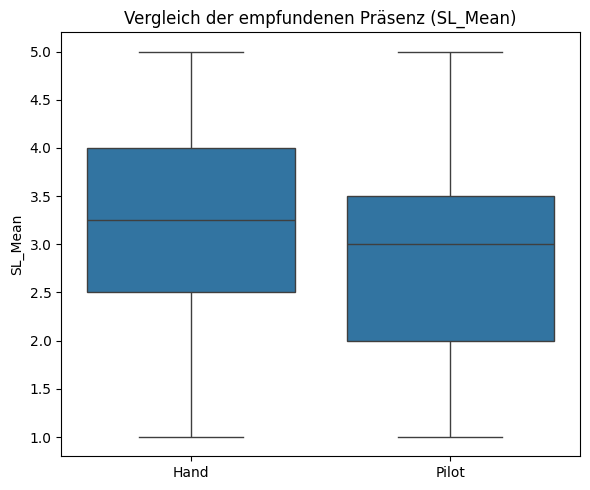

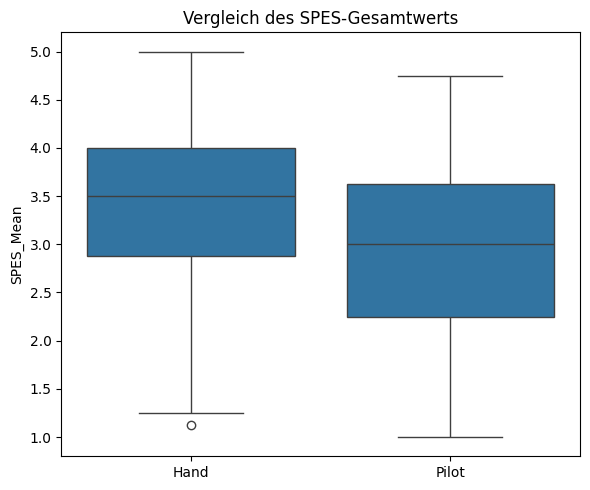

In [44]:
# Auch SL-Mittelwert berechnen
sl_items = [
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war.",
    "Es schien, als ob ich tatsächlich an der Darstellung beteiligt war.",
    "Es kam mir vor, als hätte sich mein wahrer Standort in die Umgebung der Projektion verschoben.",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion physisch anwesend war."
]

for col in sl_items:
    df_pilot[col] = df_pilot[col].apply(extract_likert_value)

df_pilot["SL_Mean"] = df_pilot[sl_items].mean(axis=1)

# SPES-Mittelwert berechnen (SL + PA)
df_pilot["SPES_Mean"] = df_pilot[sl_items + pa_items].mean(axis=1)

# Vergleichswerte für Handtracking (sind in df bereits berechnet)
sl_hand = df["SL_Mean"].dropna()
sl_pilot = df_pilot["SL_Mean"].dropna()
spes_hand = df["SPES_Mean"].dropna()
spes_pilot = df_pilot["SPES_Mean"].dropna()

# T-Tests für SL und SPES
from scipy.stats import ttest_ind

t_sl, p_sl = ttest_ind(sl_hand, sl_pilot, equal_var=False)
t_spes, p_spes = ttest_ind(spes_hand, spes_pilot, equal_var=False)

# Effektstärke (Cohen's d)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_sl = cohens_d(sl_hand, sl_pilot)
d_spes = cohens_d(spes_hand, spes_pilot)

# Ergebnisse ausgeben
print(f"T-Test SL_Mean: t = {t_sl:.3f}, p = {p_sl:.3f}, Cohen’s d = {d_sl:.3f}")
print(f"T-Test SPES_Mean: t = {t_spes:.3f}, p = {p_spes:.3f}, Cohen’s d = {d_spes:.3f}")

# Boxplot für SL_Mean
combined_sl = pd.DataFrame({
    "SL_Mean": list(sl_hand) + list(sl_pilot),
    "Gruppe": ["Hand"] * len(sl_hand) + ["Pilot"] * len(sl_pilot)
})

plt.figure(figsize=(6, 5))
sns.boxplot(data=combined_sl, x="Gruppe", y="SL_Mean")
plt.title("Vergleich der empfundenen Präsenz (SL_Mean)")
plt.ylabel("SL_Mean")
plt.xlabel("")
plt.tight_layout()
plt.show()

# Boxplot für SPES_Mean
combined_spes = pd.DataFrame({
    "SPES_Mean": list(spes_hand) + list(spes_pilot),
    "Gruppe": ["Hand"] * len(spes_hand) + ["Pilot"] * len(spes_pilot)
})

plt.figure(figsize=(6, 5))
sns.boxplot(data=combined_spes, x="Gruppe", y="SPES_Mean")
plt.title("Vergleich des SPES-Gesamtwerts")
plt.ylabel("SPES_Mean")
plt.xlabel("")
plt.tight_layout()
plt.show()


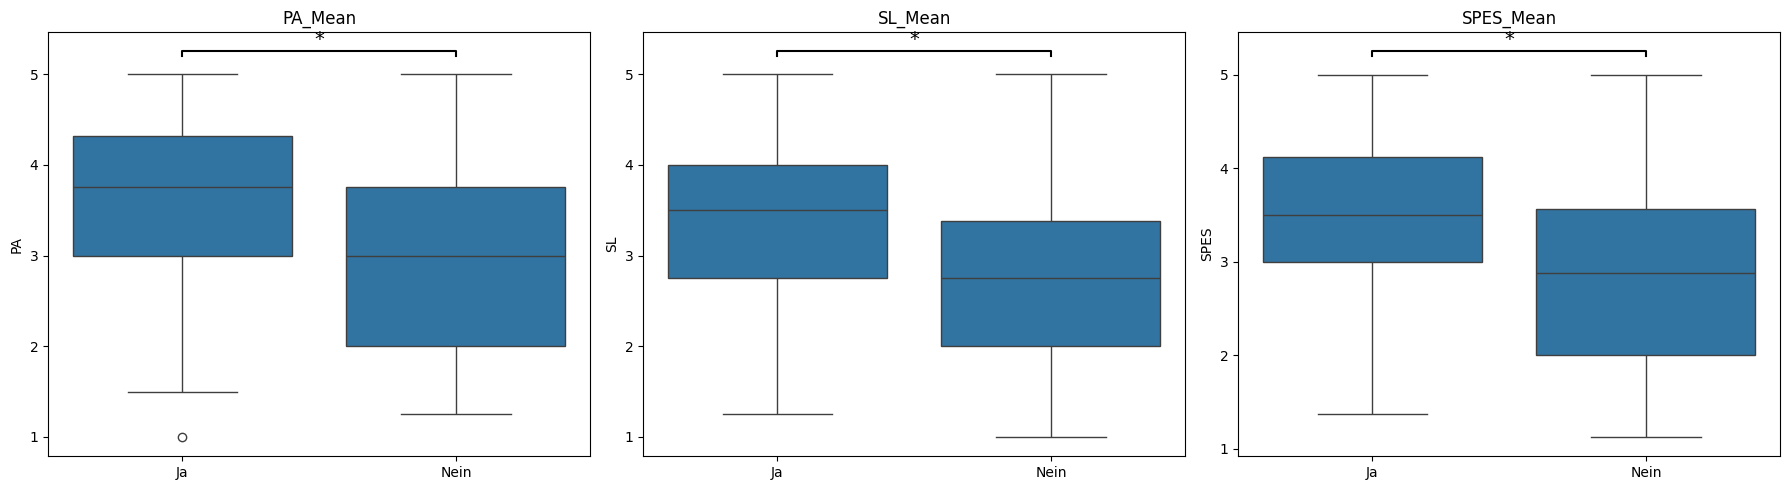

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Boxplot der SPES-Skalen nach Interaktionswahrnehmung
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot für PA_Mean
sns.boxplot(data=df, x="Interaktion_bemerkt", y="PA_Mean", ax=axs[0])
axs[0].set_title("PA_Mean")
axs[0].set_xlabel("")
axs[0].set_ylabel("PA")

# Signifikanzbalken (nur wenn signifikant, hier exemplarisch)
y = df["PA_Mean"].max() + 0.2
axs[0].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[0].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SL_Mean
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SL_Mean", ax=axs[1])
axs[1].set_title("SL_Mean")
axs[1].set_xlabel("")
axs[1].set_ylabel("SL")
y = df["SL_Mean"].max() + 0.2
axs[1].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[1].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SPES_Mean
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SPES_Mean", ax=axs[2])
axs[2].set_title("SPES_Mean")
axs[2].set_xlabel("")
axs[2].set_ylabel("SPES")
y = df["SPES_Mean"].max() + 0.2
axs[2].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[2].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()


In [46]:
df_pilot["Grashalm_interaktion_bemerkt"] = df_pilot[
    "Haben Sie bemerkt, dass Sie die Grashalmprojektion interaktiv beeinflussen können?"
].apply(lambda x: "Ja" if x == "Ja" else "Nein")

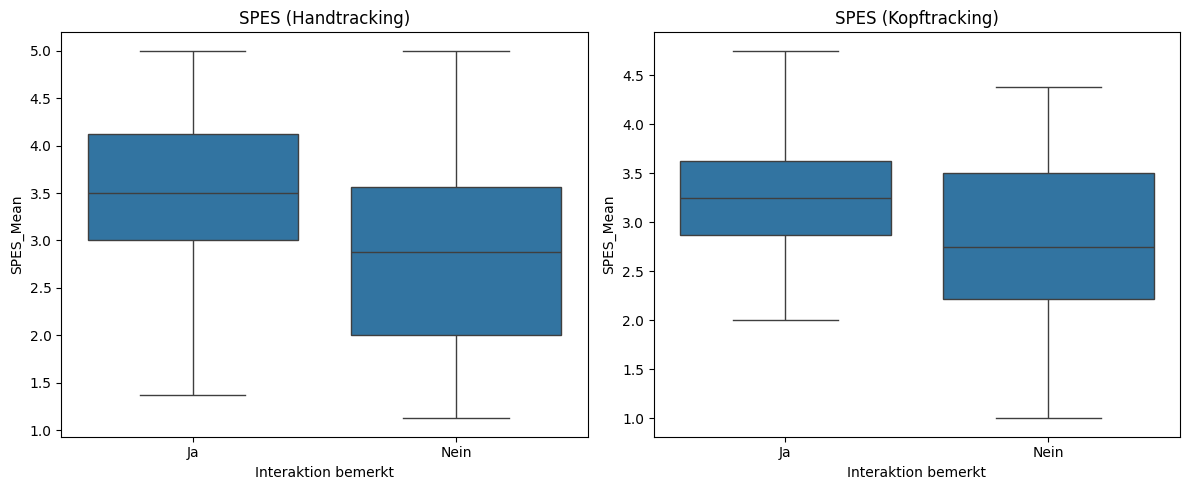

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot vorbereiten
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Hauptstudie (Handtracking)
sns.boxplot(data=df, x="Interaktion_bemerkt", y="SPES_Mean", ax=axs[0])
axs[0].set_title("SPES (Handtracking)")
axs[0].set_xlabel("Interaktion bemerkt")
axs[0].set_ylabel("SPES_Mean")

# Plot 2: Pilotstudie (Kopftracking)
sns.boxplot(data=df_pilot, x="Grashalm_interaktion_bemerkt", y="SPES_Mean", ax=axs[1])
axs[1].set_title("SPES (Kopftracking)")
axs[1].set_xlabel("Interaktion bemerkt")
axs[1].set_ylabel("SPES_Mean")

plt.tight_layout()
plt.show()



🔍 UX – Deskriptive Statistik (Hauptstudie)
count    95.000000
mean      4.119298
std       0.966233
min       1.333333
25%       3.500000
50%       4.333333
75%       5.000000
max       5.000000
Name: UX_Mean, dtype: float64

🔍 UX – Deskriptive Statistik (Pilotstudie)
count    39.000000
mean      3.042735
std       1.051814
min       1.333333
25%       2.333333
50%       3.000000
75%       3.833333
max       5.000000
Name: UX_Mean, dtype: float64

📊 t-Test UX_Mean:
t = 5.509, p = 0.000, Cohen's d = 1.086


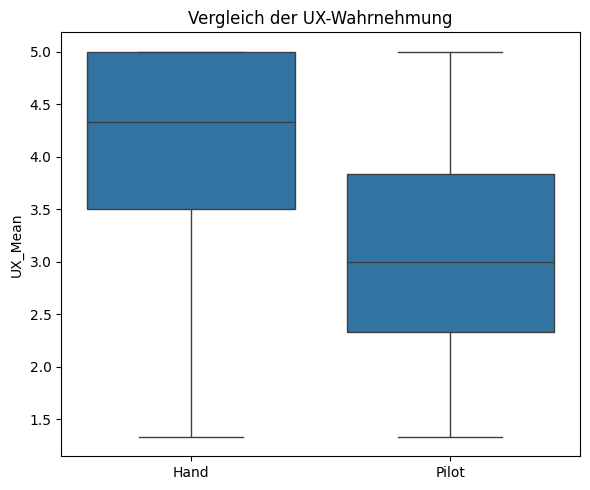

In [48]:
# 1. UX-Spalten definieren (für Hand-Studie - sind schon umbenannt)
ux_items = ["UX1", "UX2", "UX3"]

# 2. Likert-Werte bereinigen (für Hand-Studie)
for col in ux_items:
    df[col] = df[col].apply(extract_likert_value)
df["UX_Mean"] = df[ux_items].mean(axis=1)

# 3. UX-Spalten für Pilot-Studie definieren (verwende vollständige Fragetexte)
ux_items_pilot = [
    "Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.",
    "Die Steuerung des Systems war intuitiv und leicht verständlich.",
    "Ich konnte meine beabsichtigten Aktionen problemlos ausführen."
]

# 4. Überprüfe, ob die Spalten im df_pilot existieren
for col in ux_items_pilot:
    if col not in df_pilot.columns:
        print(f"Warnung: Spalte '{col}' nicht gefunden!")
    else:
        df_pilot[col] = df_pilot[col].apply(extract_likert_value)

# 5. UX_Mean für Pilot-Studie berechnen (nur wenn alle Spalten existieren)
if all(col in df_pilot.columns for col in ux_items_pilot):
    df_pilot["UX_Mean"] = df_pilot[ux_items_pilot].mean(axis=1)
    
    # 6. Deskriptive Statistik
    print("🔍 UX – Deskriptive Statistik (Hauptstudie)")
    print(df["UX_Mean"].describe())

    print("\n🔍 UX – Deskriptive Statistik (Pilotstudie)")
    print(df_pilot["UX_Mean"].describe())

    # 7. t-Test für UX-Mittelwerte
    from scipy.stats import ttest_ind

    ux_hand = df["UX_Mean"].dropna()
    ux_pilot = df_pilot["UX_Mean"].dropna()

    t_ux, p_ux = ttest_ind(ux_hand, ux_pilot, equal_var=False)

    # 8. Effektstärke
    d_ux = cohens_d(ux_hand, ux_pilot)

    # 9. Ausgabe der inferenzstatistischen Ergebnisse
    print(f"\n📊 t-Test UX_Mean:")
    print(f"t = {t_ux:.3f}, p = {p_ux:.3f}, Cohen's d = {d_ux:.3f}")

    # 10. Boxplot
    combined_ux = pd.DataFrame({
        "UX_Mean": list(ux_hand) + list(ux_pilot),
        "Gruppe": ["Hand"] * len(ux_hand) + ["Pilot"] * len(ux_pilot)
    })

    plt.figure(figsize=(6, 5))
    sns.boxplot(data=combined_ux, x="Gruppe", y="UX_Mean")
    plt.title("Vergleich der UX-Wahrnehmung")
    plt.ylabel("UX_Mean")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Einige UX-Spalten fehlen im Pilotdatensatz, Analyse übersprungen")
    # Optional: Alle verfügbaren Spalten anzeigen
    print("\nVerfügbare Spalten im Pilotdatensatz:")
    for col in df_pilot.columns:
        print(f"- {col}")

In [49]:
from scipy.stats import pearsonr, norm
from math import atanh, sqrt

# DataFrame für Pilot-Teilnehmer erstellen, die die Interaktion bemerkt haben
df_pilot_interaktiv = df_pilot[df_pilot["Grashalm_interaktion_bemerkt"] == "Ja"].copy()

# Korrelationen berechnen
# Hauptstudie
r_ux_sl_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SL_Mean"])
r_ux_pa_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["PA_Mean"])
r_ux_spes_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SPES_Mean"])

# Pilotstudie
r_ux_sl_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["SL_Mean"])
r_ux_pa_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["PA_Mean"])
r_ux_spes_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["SPES_Mean"])

# Fisher z-Test Funktion
def compare_correlations(r1, r2, n1, n2):
    z1 = atanh(r1)
    z2 = atanh(r2)
    se = sqrt(1/(n1 - 3) + 1/(n2 - 3))
    z = (z1 - z2) / se
    p = 2 * (1 - norm.cdf(abs(z)))  # stats.norm korrigiert zu norm
    return z, p

# Gruppengrößen
n_hand = len(df_interaktiv)
n_pilot = len(df_pilot_interaktiv)

# Tests
results = []

In [50]:
from scipy.stats import pearsonr, norm
from math import atanh, sqrt

# Korrelationen berechnen
# Hauptstudie
r_ux_sl_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SL_Mean"])
r_ux_pa_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["PA_Mean"])
r_ux_spes_hand, _ = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SPES_Mean"])

# Pilotstudie
r_ux_sl_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["SL_Mean"])
r_ux_pa_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["PA_Mean"])
r_ux_spes_pilot, _ = pearsonr(df_pilot_interaktiv["UX_Mean"], df_pilot_interaktiv["SPES_Mean"])

# Fisher z-Test Funktion
def compare_correlations(r1, r2, n1, n2):
    z1 = atanh(r1)
    z2 = atanh(r2)
    se = sqrt(1/(n1 - 3) + 1/(n2 - 3))
    z = (z1 - z2) / se
    p = 2 * (1 - norm.cdf(abs(z)))  # stats.norm.cdf korrigiert zu norm.cdf
    return z, p

# Gruppengrößen
n_hand = len(df_interaktiv)
n_pilot = len(df_pilot_interaktiv)

# Tests
results = []
for label, r1, r2 in zip(
    ["UX–SL", "UX–PA", "UX–SPES"],
    [r_ux_sl_hand, r_ux_pa_hand, r_ux_spes_hand],
    [r_ux_sl_pilot, r_ux_pa_pilot, r_ux_spes_pilot]
):
    z, p = compare_correlations(r1, r2, n_hand, n_pilot)
    results.append({
        "Zusammenhang": label,
        "r (Haupt)": round(r1, 3),
        "r (Pilot)": round(r2, 3),
        "z-Wert": round(z, 3),
        "p-Wert": round(p, 3)
    })

# Ergebnisse anzeigen
df_results = pd.DataFrame(results)
display(df_results)

,Zusammenhang,r (Haupt),r (Pilot),z-Wert,p-Wert
0,UX–SL,0.398,0.571,-1.015,0.310
1,UX–PA,0.378,0.612,-1.404,0.160
2,UX–SPES,0.425,0.701,-1.855,0.064


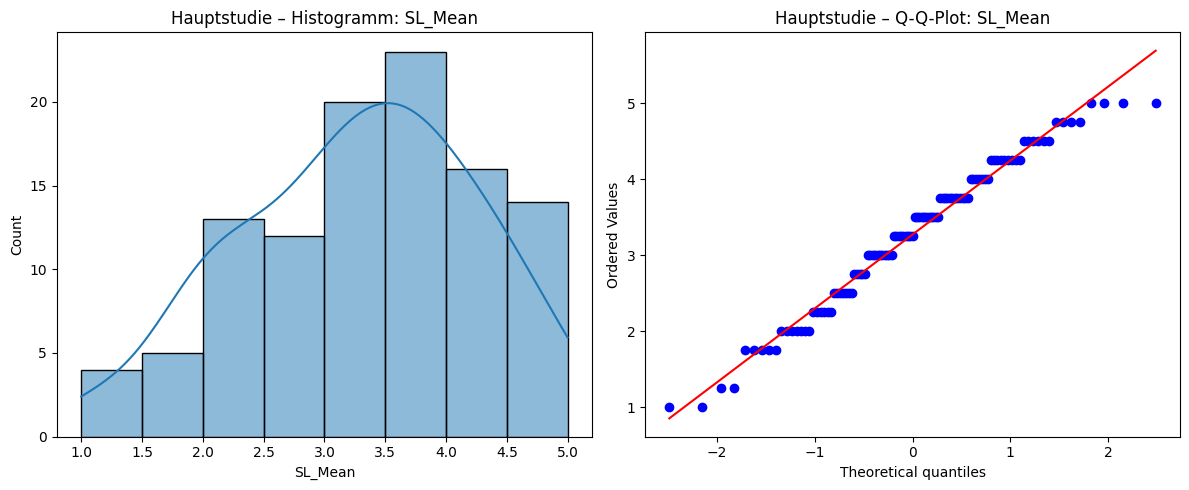

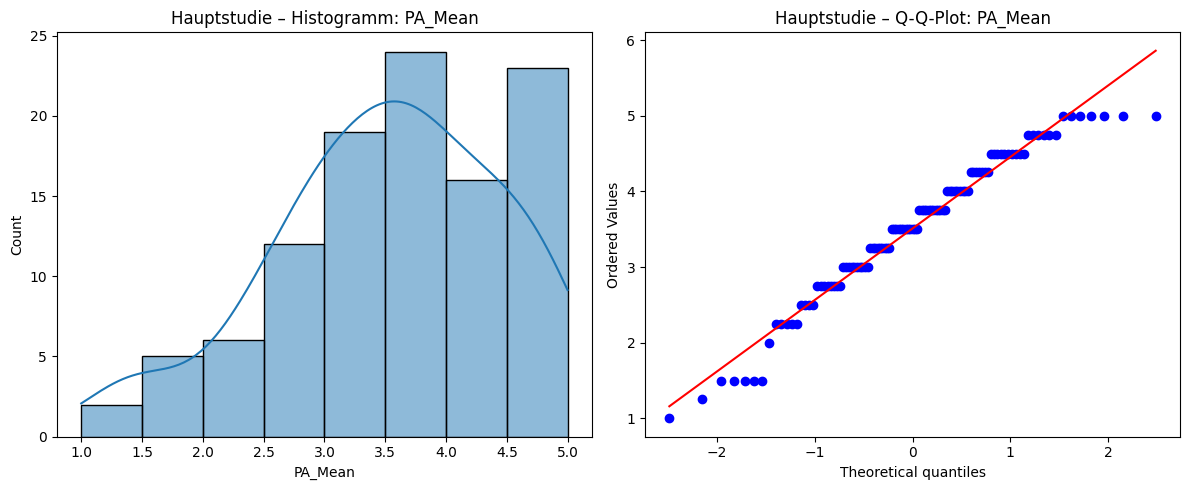

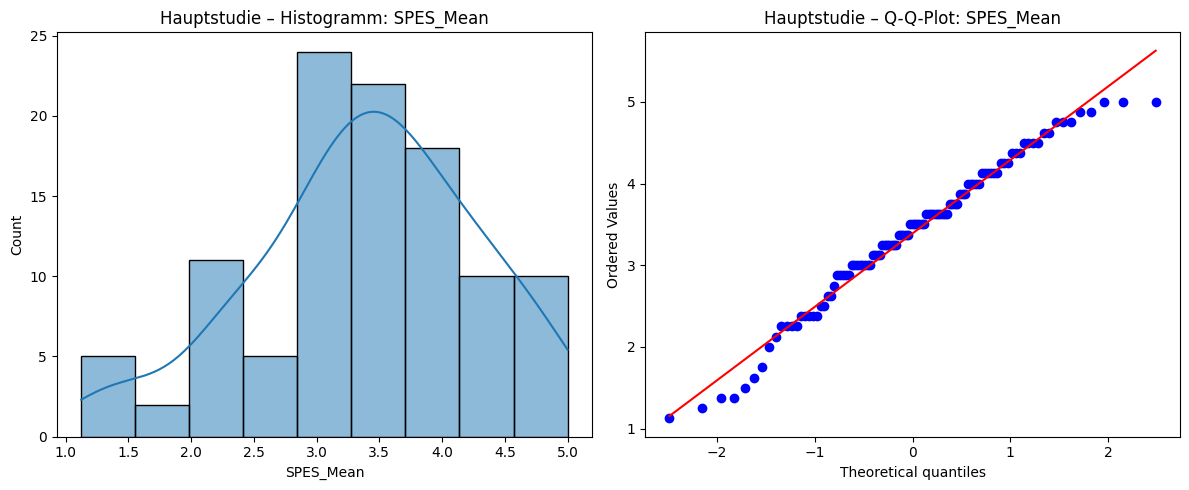

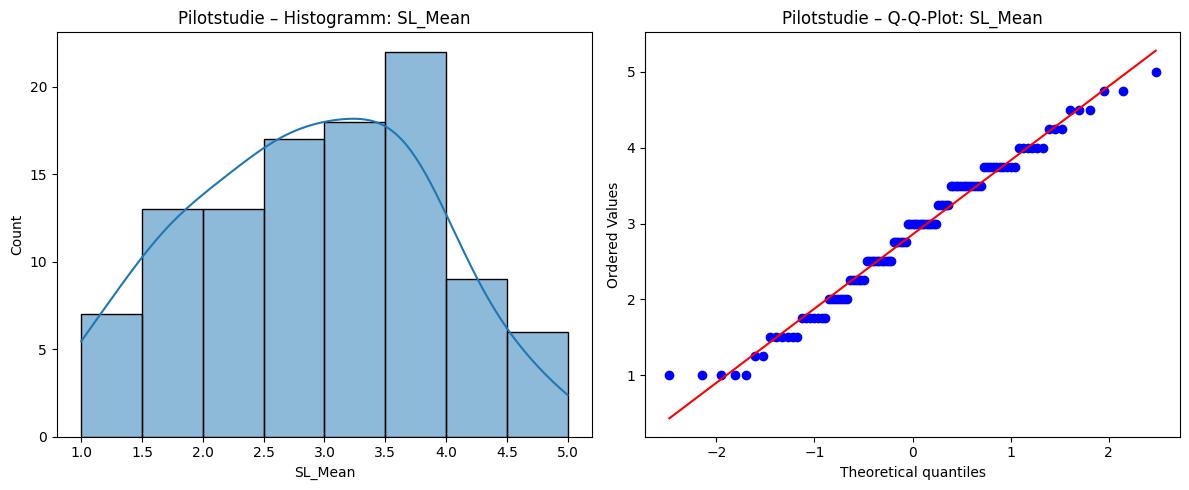

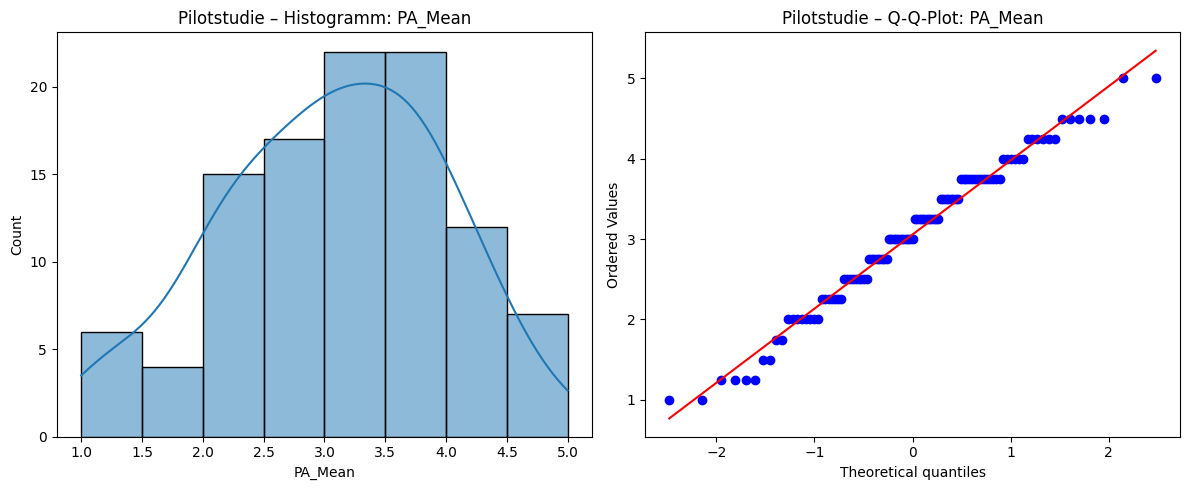

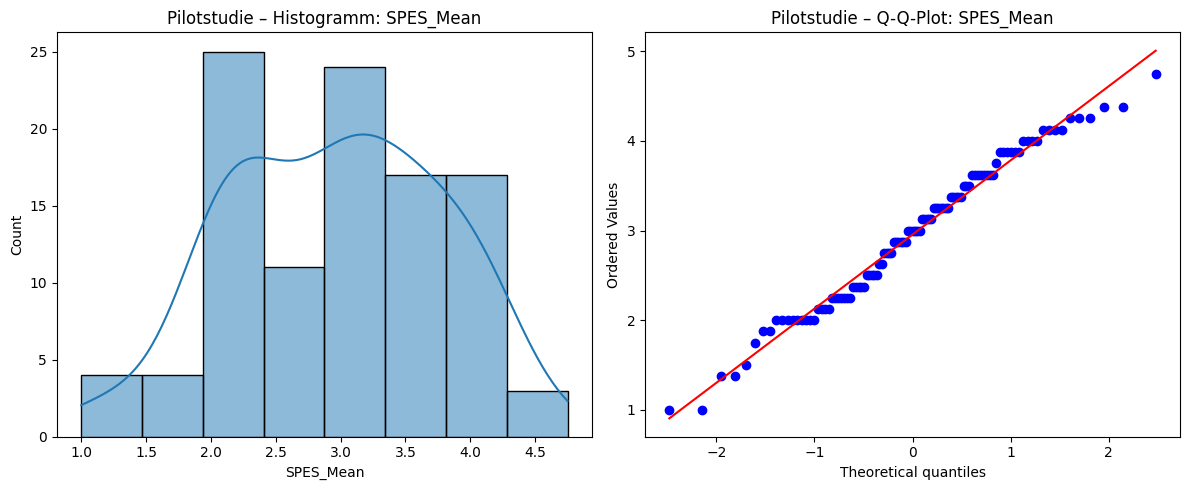

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Relevante SPES-Skalen definieren - korrigiert mit den richtigen Spaltennamen
spes_vars = ['SL_Mean', 'PA_Mean', 'SPES_Mean']

# Funktion zur Visualisierung von Histogramm und Q-Q-Plot
def plot_histogram_and_qq(data, label):
    for var in spes_vars:
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))

        # Histogramm mit KDE
        sns.histplot(data[var], kde=True, ax=axs[0])
        axs[0].set_title(f'{label} – Histogramm: {var}')
        axs[0].set_xlabel(var)

        # Q-Q-Plot
        stats.probplot(data[var], dist="norm", plot=axs[1])
        axs[1].set_title(f'{label} – Q-Q-Plot: {var}')

        plt.tight_layout()
        plt.show()

# Plots für Hauptstudie und Pilotstudie erzeugen
plot_histogram_and_qq(df, "Hauptstudie")
plot_histogram_and_qq(df_pilot, "Pilotstudie")

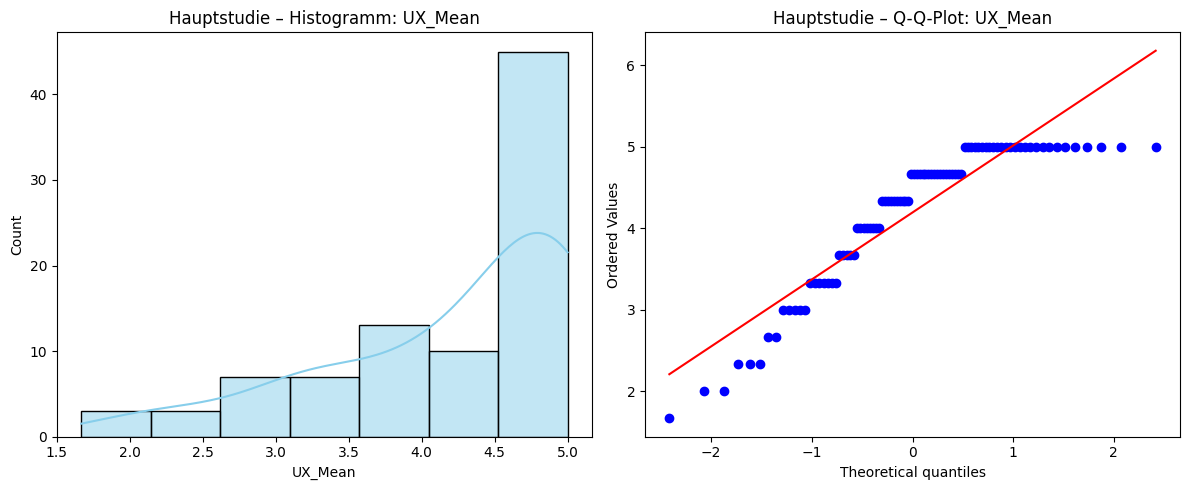

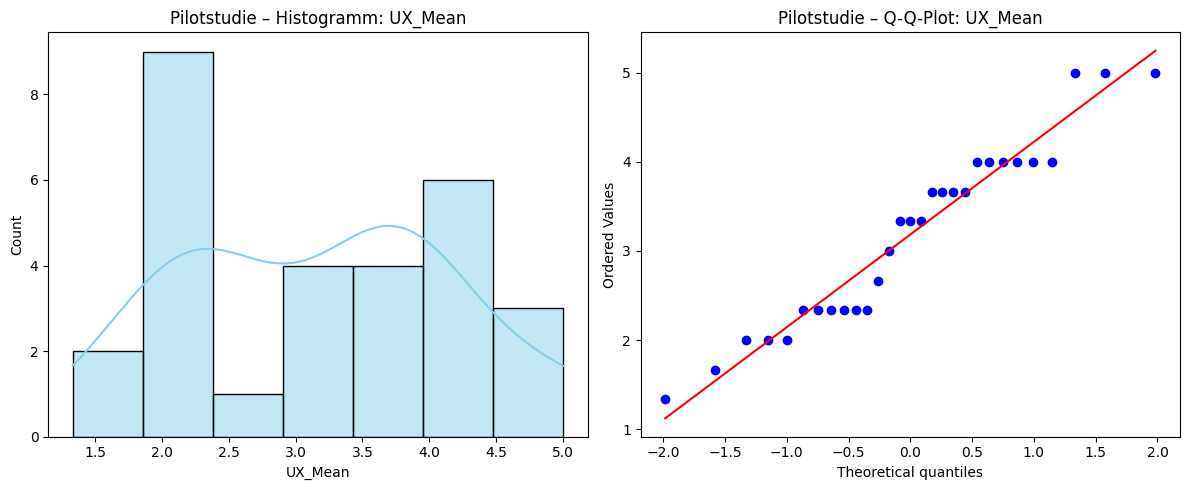

In [52]:
# Funktion: Histogramm + Q-Q-Plot
def plot_hist_qq(data, title_prefix, variable):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data[variable], kde=True, ax=axes[0], bins=7, color='skyblue')
    axes[0].set_title(f'{title_prefix} – Histogramm: {variable}')
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Count')

    stats.probplot(data[variable], dist="norm", plot=axes[1])
    axes[1].set_title(f'{title_prefix} – Q-Q-Plot: {variable}')

    plt.tight_layout()
    plt.show()

# UX-Verteilung untersuchen
plot_hist_qq(df_interaktiv, "Hauptstudie", "UX_Mean")
plot_hist_qq(df_pilot_interaktiv, "Pilotstudie", "UX_Mean")

In [54]:
# Relevante numerische Variablen für deskriptive Statistik
variablen_num = ["UX_Mean", "SL_Mean", "PA_Mean", "SPES_Mean", "Alter", "Aufenthaltsdauer"]
variablen_kat = ["Geschlecht", "Erfahrung", "Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien?"]

# Kategorische Items bei Bedarf umbenennen (Pilot-Variante hat andere Bezeichner)
df_pilot = df_pilot.rename(columns={
    "Wie alt sind Sie? (Angabe in Jahren)": "Alter",
    "Wie lange haben Sie sich in der Installation aufgehalten haben?": "Aufenthaltsdauer",
    "Welchem Geschlecht fühlen Sie sich zugehörig?": "Geschlecht",
    "Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?": "Erfahrung",
    "Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien": "Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien?"
})

# Numerische Statistik
desc_hand_num = df[variablen_num].describe().T.add_prefix("Hand_")
desc_pilot_num = df_pilot[variablen_num].describe().T.add_prefix("Pilot_")
desc_num_combined = pd.concat([desc_hand_num, desc_pilot_num], axis=1).round(2)

# Kategorische Verteilungen
def kategorische_verteilung(df, spalten, gruppenname):
    verteilungen = {}
    for spalte in spalten:
        if spalte in df.columns:
            verteilungen[spalte] = df[spalte].value_counts(dropna=False)
    return pd.concat(verteilungen, axis=1).fillna(0).astype(int).add_prefix(f"{gruppenname}_")

verteilung_hand = kategorische_verteilung(df, variablen_kat, "Hand")
verteilung_pilot = kategorische_verteilung(df_pilot, variablen_kat, "Pilot")
verteilung_combined = pd.concat([verteilung_hand, verteilung_pilot], axis=1)

# Tabellen anzeigen
# Eigene Funktion zur Anzeige von Dataframes mit Titel
def display_df_with_title(name, dataframe):
    print(f"\n--- {name} ---")
    display(dataframe)  # Funktioniert in Jupyter
    
# Tabellen anzeigen
display_df_with_title("Deskriptive Statistik – Numerisch", desc_num_combined)
display_df_with_title("Deskriptive Statistik – Kategorisch", verteilung_combined)



--- Deskriptive Statistik – Numerisch ---


,Hand_count,Hand_mean,Hand_std,Hand_min,Hand_25%,Hand_50%,Hand_75%,Hand_max,Pilot_count,Pilot_mean,Pilot_std,Pilot_min,Pilot_25%,Pilot_50%,Pilot_75%,Pilot_max
UX_Mean,95.0,4.12,0.97,1.33,3.50,4.33,5.00,5.0,39.0,3.04,1.05,1.33,2.33,3.0,3.83,5.00
SL_Mean,107.0,3.27,0.97,1.00,2.50,3.25,4.00,5.0,105.0,2.85,0.97,1.00,2.00,3.0,3.50,5.00
PA_Mean,107.0,3.51,0.95,1.00,3.00,3.50,4.25,5.0,105.0,3.06,0.92,1.00,2.50,3.0,3.75,5.00
SPES_Mean,107.0,3.39,0.90,1.12,2.88,3.50,4.00,5.0,105.0,2.96,0.82,1.00,2.25,3.0,3.62,4.75
Alter,106.0,47.92,18.50,21.00,31.25,44.00,65.75,80.0,105.0,45.16,18.99,0.00,27.00,48.0,61.00,84.00



--- Deskriptive Statistik – Kategorisch ---


,Hand_Geschlecht,Hand_Erfahrung,Hand_Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien?,Pilot_Geschlecht,Pilot_Erfahrung,Pilot_Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien?
weiblich,79.0,0.0,0.0,NaN,NaN,NaN
männlich,26.0,0.0,0.0,NaN,NaN,NaN
NaN,2.0,0.0,0.0,NaN,NaN,NaN
"Ja, mehrfach",0.0,41.0,0.0,0.0,59.0,0.0
Nein,0.0,37.0,0.0,0.0,25.0,0.0
"Ja, einmal",0.0,29.0,0.0,0.0,21.0,0.0
3,0.0,0.0,36.0,0.0,0.0,28.0
4,0.0,0.0,32.0,0.0,0.0,32.0
5,0.0,0.0,23.0,0.0,0.0,30.0
2,0.0,0.0,9.0,0.0,0.0,11.0


In [65]:
print(combined_df.columns)


Index(['PA_Mean', 'Gruppe'], dtype='object')


In [71]:
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.mediation import Mediation

# 1. Index zurücksetzen zur sicheren Ausrichtung
df = df.reset_index(drop=True)
df_pilot = df_pilot.reset_index(drop=True)
combined_df = combined_df.reset_index(drop=True)

# 2. UX/SPES-Spalten initialisieren
combined_df["UX_Mean"] = np.nan
combined_df["SPES_Mean"] = np.nan

# 3. UX/SPES-Werte korrekt zuordnen nach Gruppe
combined_df.loc[combined_df["Gruppe"] == "Hand", "UX_Mean"] = df["UX_Mean"].values
combined_df.loc[combined_df["Gruppe"] == "Hand", "SPES_Mean"] = df["SPES_Mean"].values
combined_df.loc[combined_df["Gruppe"] == "Pilot", "UX_Mean"] = df_pilot["UX_Mean"].values
combined_df.loc[combined_df["Gruppe"] == "Pilot", "SPES_Mean"] = df_pilot["SPES_Mean"].values

# 4. Codieren der numerischen Gruppenvariable (1=Hand, 0=Pilot)
combined_df["Gruppe_num"] = (combined_df["Gruppe"] == "Hand").astype(int)

# 5. DataFrame für Mediationsanalyse vorbereiten (ohne fehlende Werte)
df_mediation = combined_df[["Gruppe_num", "UX_Mean", "SPES_Mean"]].dropna()

# 6. Mediationsmodell fitten
model_a = ols("UX_Mean ~ Gruppe_num", data=df_mediation)
model_b = ols("SPES_Mean ~ UX_Mean + Gruppe_num", data=df_mediation)
med = Mediation(model_b, model_a, mediator="UX_Mean", exposure="Gruppe_num")
med_result = med.fit()

# 7. Zusammenfassung der Mediationsergebnisse anzeigen
print(med_result.summary())


                          Estimate  Lower CI bound  Upper CI bound  P-value
ACME (control)            0.449036        0.249162        0.673871    0.000
ACME (treated)            0.449036        0.249162        0.673871    0.000
ADE (control)            -0.168650       -0.471399        0.106808    0.244
ADE (treated)            -0.168650       -0.471399        0.106808    0.244
Total effect              0.280386       -0.041338        0.600824    0.100
Prop. mediated (control)  1.517069       -7.755813        7.824752    0.100
Prop. mediated (treated)  1.517069       -7.755813        7.824752    0.100
ACME (average)            0.449036        0.249162        0.673871    0.000
ADE (average)            -0.168650       -0.471399        0.106808    0.244
Prop. mediated (average)  1.517069       -7.755813        7.824752    0.100


In [74]:
# 1. Gibt es fehlende UX oder SPES Werte?
print(df_mediation.isnull().sum())

# 2. Anzahl der Fälle pro Gruppe nach dem Drop
print(df_mediation["Gruppe_num"].value_counts())

# 3. Mittelwerte vergleichen: stimmen sie mit Original-Dataframes überein?
print("Pilot UX/SPES:", df_pilot["UX_Mean"].mean(), df_pilot["SPES_Mean"].mean())
print("Hand UX/SPES:", df["UX_Mean"].mean(), df["SPES_Mean"].mean())
print("Combined DF Pilot:", df_mediation[df_mediation["Gruppe_num"] == 0][["UX_Mean", "SPES_Mean"]].mean())
print("Combined DF Hand:", df_mediation[df_mediation["Gruppe_num"] == 1][["UX_Mean", "SPES_Mean"]].mean())



Gruppe_num    0
UX_Mean       0
SPES_Mean     0
dtype: int64
Gruppe_num
1    95
0    39
Name: count, dtype: int64
Pilot UX/SPES: 3.0427350427350426 2.955952380952381
Hand UX/SPES: 4.119298245614035 3.3901869158878504
Combined DF Pilot: UX_Mean      3.042735
SPES_Mean    3.211538
dtype: float64
Combined DF Hand: UX_Mean      4.119298
SPES_Mean    3.494737
dtype: float64


In [85]:
print(df.columns.tolist())


['Antwort ID', 'Zeitstempel', 'Letzte Seite', 'Start-Sprache', 'Zufallsstartwert', 'Datum gestartet', 'Datum letzte Aktivität', 'Alter', 'Geschlecht', 'Aufenthaltsdauer', 'Erfahrung', 'Wie sicher fühlen Sie sich im Umgang mit modernen digitalen Technologien?', 'SL1', 'SL2', 'SL3', 'SL4', 'Haben Sie bemerkt, dass die Blumenprojektion sich durch den/die Sound/Geräusche beeinflussen lässt?', 'Haben Sie bemerkt, dass ihre Handbewegung die Projektion auf der linken Seite beeinflusst?', 'Ich fühlte mich durch die Interaktivität des Systems stärker in das Erlebnis eingebunden.', 'PA1', 'PA2', 'PA3', 'PA4', 'UX1', 'UX2', 'UX3', 'Zufriedenheit', 'Was hat Ihnen an der Installation am meisten gefallen?', 'Was hätte verbessert werden können?', 'Empfehlung', 'Gesamtzeit', 'Gruppenzeit: Biografische Fragen', 'Fragenzeit: G02Q02', 'Fragenzeit: G02Q03', 'Fragenzeit: G02Q04', 'Fragenzeit: G02Q05', 'Fragenzeit: G02Q06', 'Gruppenzeit: Subjektive Wahrnehmung von Räumlicher Präsenz in der Kunstinstallation

In [86]:
pilot_zufriedenheit = pd.to_numeric(
    df_pilot["Wie zufrieden waren Sie insgesamt mit der Rauminstallation?"],
    errors="coerce"
).dropna()

hand_zufriedenheit = pd.to_numeric(
    df["Zufriedenheit"],
    errors="coerce"
).dropna()

In [87]:
print("Pilotstudie (Kopftracking):")
print(pilot_zufriedenheit.describe())

print("\nHauptstudie (Handtracking):")
print(hand_zufriedenheit.describe())


Pilotstudie (Kopftracking):
count    105.000000
mean       3.742857
std        1.092180
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Wie zufrieden waren Sie insgesamt mit der Rauminstallation?, dtype: float64

Hauptstudie (Handtracking):
count    107.000000
mean       4.168224
std        1.050480
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Zufriedenheit, dtype: float64


In [88]:

t_stat, p_value = ttest_ind(hand_zufriedenheit, pilot_zufriedenheit, equal_var=False)

print(f"\nt = {t_stat:.3f}, p = {p_value:.4f}")



t = 2.889, p = 0.0043


In [89]:

def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*np.var(x, ddof=1) + (ny - 1)*np.var(y, ddof=1)) / (nx + ny - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

d = cohens_d(hand_zufriedenheit, pilot_zufriedenheit)
print(f"Cohen's d = {d:.3f}")


Cohen's d = 0.397


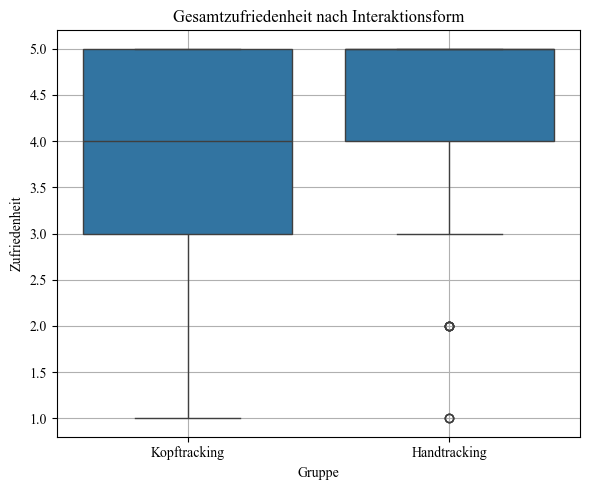

In [90]:

df_plot = pd.DataFrame({
    "Zufriedenheit": pd.concat([pilot_zufriedenheit, hand_zufriedenheit], ignore_index=True),
    "Gruppe": ["Kopftracking"] * len(pilot_zufriedenheit) + ["Handtracking"] * len(hand_zufriedenheit)
})

plt.figure(figsize=(6, 5))
sns.boxplot(x="Gruppe", y="Zufriedenheit", data=df_plot)
plt.title("Gesamtzufriedenheit nach Interaktionsform")
plt.grid(True)
plt.tight_layout()
plt.show()
